In \[71\]:

    from scipy import stats #thư viện liên quan đến tính toán khoa học
    import statsmodels.api as sm #mô-đun Python cung cấp các lớp và chức năng để ước tính nhiều mô hình thống kê khác nhau

    import warnings
    warnings.filterwarnings('ignore') # đưa ra thông báo và cảnh báo

    #importing the libraries
    import numpy as np #hỗ trợ cho việc tính toán các mảng nhiều chiều, có kích thước lớn (thư viện lõi)
    import pandas as pd #làm vs việc dữ liệu có cấu trúc (dạng bảng, đa chiều, có tiềm năng không đồng nhất) và dữ liệu chuỗi thời gian.
    #thống kê và thăm dò dữ liệu thống kê (NUM , PAN)
    import matplotlib.pyplot as plt #vẽ biểu đồ
    import seaborn as sns #thư viện trực quan hóa dữ liệu (tạo ra h/a)

In \[72\]:

    cars = pd.read_csv('E:\DATA-project/CarPrice_Assignment.csv')
    cars

Out\[72\]:

|     | car_ID | symboling | CarName                  | fueltype | aspiration | doornumber | carbody     | drivewheel | enginelocation | wheelbase | ... | enginesize | fuelsystem | boreratio | stroke | compressionratio | horsepower | peakrpm | citympg | highwaympg | price   |
|-----|--------|-----------|--------------------------|----------|------------|------------|-------------|------------|----------------|-----------|-----|------------|------------|-----------|--------|------------------|------------|---------|---------|------------|---------|
| 0   | 1      | 3         | alfa-romero giulia       | gas      | std        | two        | convertible | rwd        | front          | 88.6      | ... | 130        | mpfi       | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 13495.0 |
| 1   | 2      | 3         | alfa-romero stelvio      | gas      | std        | two        | convertible | rwd        | front          | 88.6      | ... | 130        | mpfi       | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 16500.0 |
| 2   | 3      | 1         | alfa-romero Quadrifoglio | gas      | std        | two        | hatchback   | rwd        | front          | 94.5      | ... | 152        | mpfi       | 2.68      | 3.47   | 9.0              | 154        | 5000    | 19      | 26         | 16500.0 |
| 3   | 4      | 2         | audi 100 ls              | gas      | std        | four       | sedan       | fwd        | front          | 99.8      | ... | 109        | mpfi       | 3.19      | 3.40   | 10.0             | 102        | 5500    | 24      | 30         | 13950.0 |
| 4   | 5      | 2         | audi 100ls               | gas      | std        | four       | sedan       | 4wd        | front          | 99.4      | ... | 136        | mpfi       | 3.19      | 3.40   | 8.0              | 115        | 5500    | 18      | 22         | 17450.0 |
| ... | ...    | ...       | ...                      | ...      | ...        | ...        | ...         | ...        | ...            | ...       | ... | ...        | ...        | ...       | ...    | ...              | ...        | ...     | ...     | ...        | ...     |
| 200 | 201    | -1        | volvo 145e (sw)          | gas      | std        | four       | sedan       | rwd        | front          | 109.1     | ... | 141        | mpfi       | 3.78      | 3.15   | 9.5              | 114        | 5400    | 23      | 28         | 16845.0 |
| 201 | 202    | -1        | volvo 144ea              | gas      | turbo      | four       | sedan       | rwd        | front          | 109.1     | ... | 141        | mpfi       | 3.78      | 3.15   | 8.7              | 160        | 5300    | 19      | 25         | 19045.0 |
| 202 | 203    | -1        | volvo 244dl              | gas      | std        | four       | sedan       | rwd        | front          | 109.1     | ... | 173        | mpfi       | 3.58      | 2.87   | 8.8              | 134        | 5500    | 18      | 23         | 21485.0 |
| 203 | 204    | -1        | volvo 246                | diesel   | turbo      | four       | sedan       | rwd        | front          | 109.1     | ... | 145        | idi        | 3.01      | 3.40   | 23.0             | 106        | 4800    | 26      | 27         | 22470.0 |
| 204 | 205    | -1        | volvo 264gl              | gas      | turbo      | four       | sedan       | rwd        | front          | 109.1     | ... | 141        | mpfi       | 3.78      | 3.15   | 9.5              | 114        | 5400    | 19      | 25         | 22625.0 |

205 rows × 26 columns

In \[73\]:

    CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
    cars.insert(3,"CompanyName",CompanyName)
    cars.drop(['CarName'],axis=1,inplace=True)
    cars.head()

Out\[73\]:

|     | car_ID | symboling | CompanyName | fueltype | aspiration | doornumber | carbody     | drivewheel | enginelocation | wheelbase | ... | enginesize | fuelsystem | boreratio | stroke | compressionratio | horsepower | peakrpm | citympg | highwaympg | price   |
|-----|--------|-----------|-------------|----------|------------|------------|-------------|------------|----------------|-----------|-----|------------|------------|-----------|--------|------------------|------------|---------|---------|------------|---------|
| 0   | 1      | 3         | alfa-romero | gas      | std        | two        | convertible | rwd        | front          | 88.6      | ... | 130        | mpfi       | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 13495.0 |
| 1   | 2      | 3         | alfa-romero | gas      | std        | two        | convertible | rwd        | front          | 88.6      | ... | 130        | mpfi       | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 16500.0 |
| 2   | 3      | 1         | alfa-romero | gas      | std        | two        | hatchback   | rwd        | front          | 94.5      | ... | 152        | mpfi       | 2.68      | 3.47   | 9.0              | 154        | 5000    | 19      | 26         | 16500.0 |
| 3   | 4      | 2         | audi        | gas      | std        | four       | sedan       | fwd        | front          | 99.8      | ... | 109        | mpfi       | 3.19      | 3.40   | 10.0             | 102        | 5500    | 24      | 30         | 13950.0 |
| 4   | 5      | 2         | audi        | gas      | std        | four       | sedan       | 4wd        | front          | 99.4      | ... | 136        | mpfi       | 3.19      | 3.40   | 8.0              | 115        | 5500    | 18      | 22         | 17450.0 |

5 rows × 26 columns

In \[74\]:

    cars.CompanyName.unique()

Out\[74\]:

    array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
           'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
           'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
           'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
           'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In \[75\]:

    cars.CompanyName = cars.CompanyName.str.lower()

    def replace_name(a,b):
        cars.CompanyName.replace(a,b,inplace=True)

    replace_name('maxda','mazda')
    replace_name('porcshce','porsche')
    replace_name('toyouta','toyota')
    replace_name('vokswagen','volkswagen')
    replace_name('vw','volkswagen')

    cars.CompanyName.unique()

Out\[75\]:

    array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
           'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
           'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
           'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

biểu đồ Chênh lệnh về giá xe

In \[76\]:

    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1) #RoW-Clum-local
    plt.title('Car Price Distribution Plot') #phân phối giá xe
    sns.distplot(cars.price) #cong

    plt.subplot(1,2,2)
    plt.title('Car Price Spread') # chênh lệch giá
    sns.boxplot(y=cars.price) #phân bố nổi trội

    plt.show()

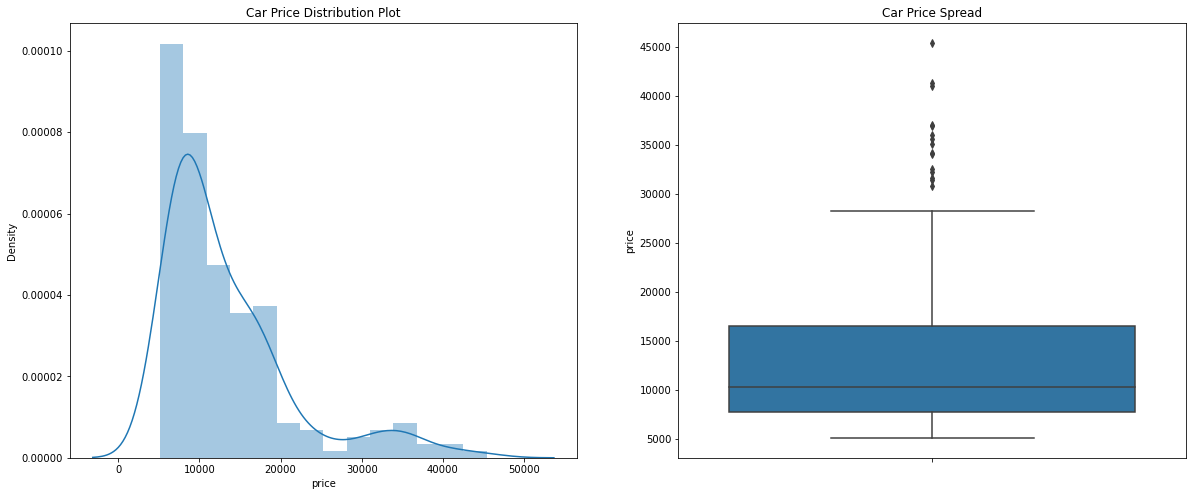

bảng số liệu về giá xe

In \[49\]:

    print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

    count      205.000000
    mean     13276.710571
    std       7988.852332
    min       5118.000000
    25%       7788.000000
    50%      10295.000000
    75%      16503.000000
    85%      18500.000000
    90%      22563.000000
    100%     45400.000000
    max      45400.000000
    Name: price, dtype: float64

Nhiều Yếu Tố Ảnh Hưởng Đến Giá

1,sự cạnh tranh trong các tầm giá?(thấp , trung , cao) 2,độ phổ biến của
các loại nhiên liệu và tăng áp của xe. 3,nguyên liêu ảnh hưởng đến xu
hướng thị trường sản xuất xe ? 4,độ phổ biến của kiểu dáng xe và giá
thành

In \[50\]:

    def pp(x,y):
        sns.pairplot(cars, x_vars=[x,y], y_vars='price',size=6, aspect=1, kind='scatter') #aspect:tỉ lệ cột , size là to số , kind: dạng biểu đồ
        plt.show()

    pp('CompanyName','fueltype')
    pp('aspiration','carbody')
    pp('symboling','enginetype')
    pp('enginelocation','fuelsystem')
    pp('cylindernumber','doornumber')

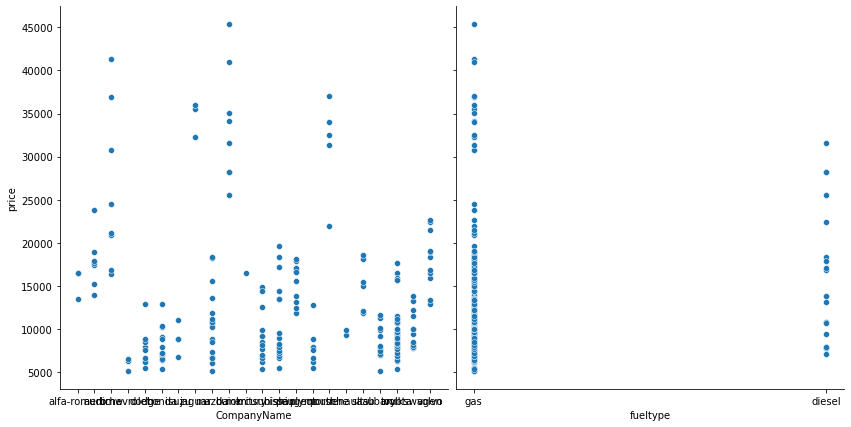

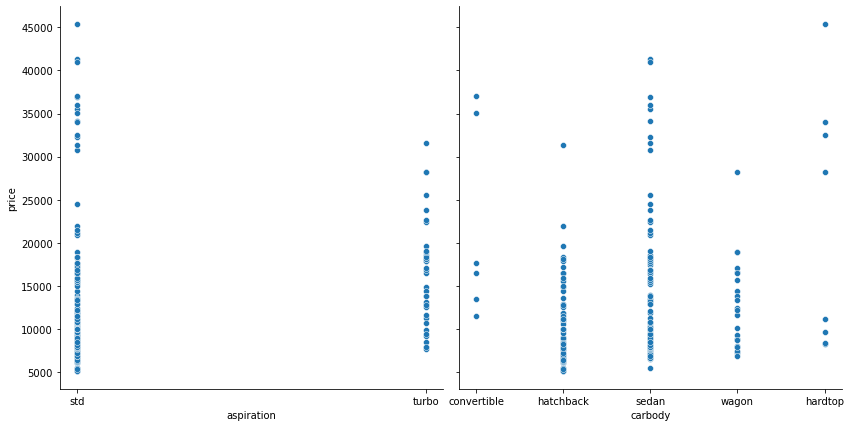

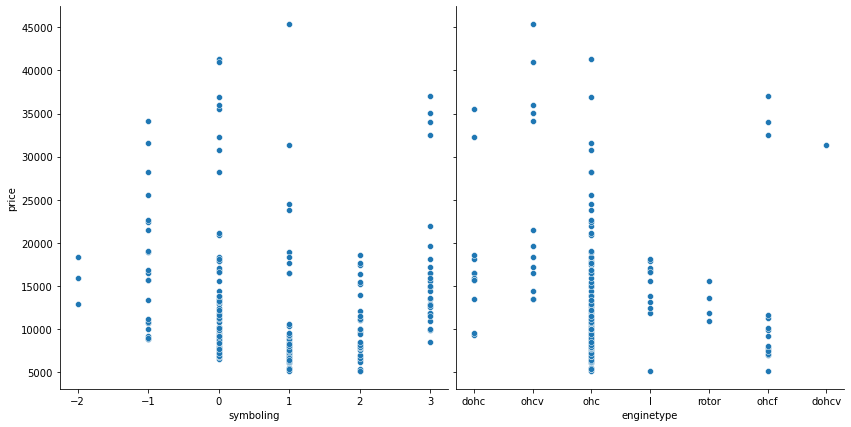

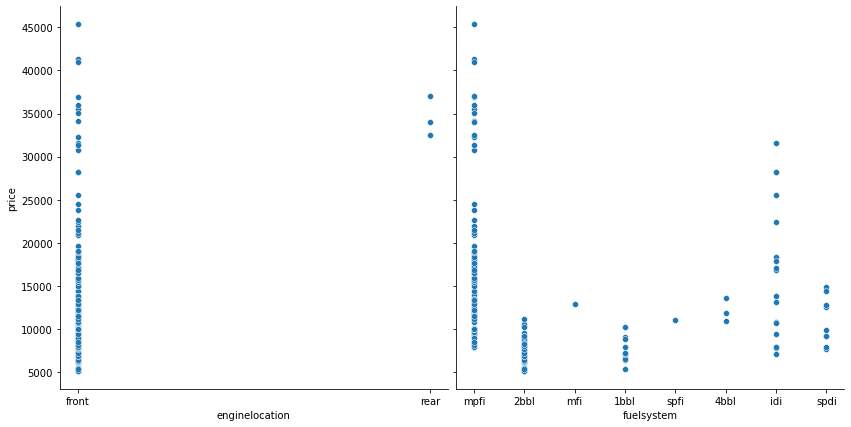

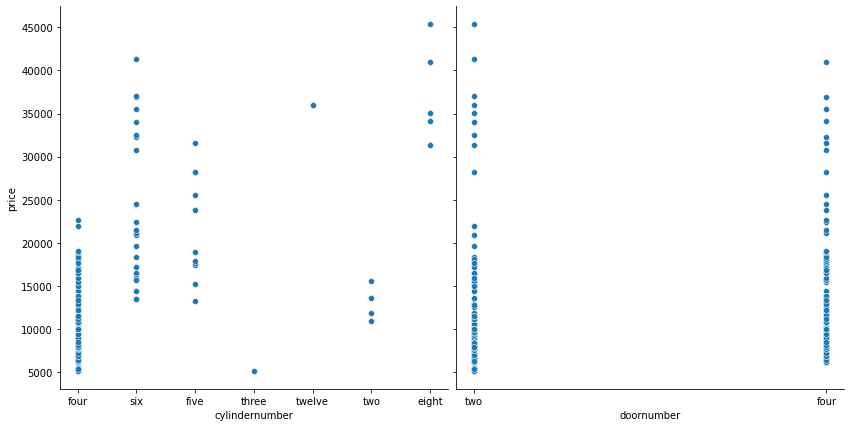

In \[51\]:

    def pp(x):
        sns.pairplot(cars, x_vars=[x], y_vars='price',size=6, aspect=1, kind='scatter') #aspect:tỉ lệ cột , size là to số , kind: dạng biểu đồ
        plt.show()

    pp('drivewheel')

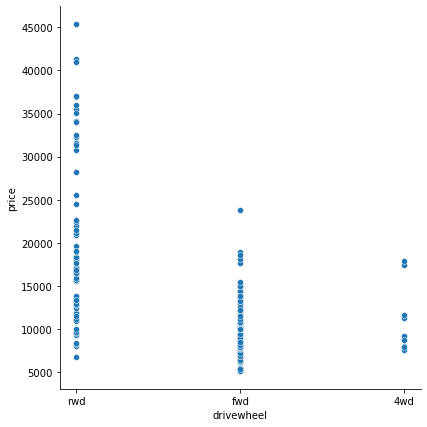

Đặc biệt

In \[52\]:

    def pp(x):
        sns.pairplot(cars, x_vars=[x], y_vars='price',size=6, aspect=1, kind='scatter') #aspect:tỉ lệ cột , size là to số , kind: dạng biểu đồ
        plt.show()

    pp('horsepower')

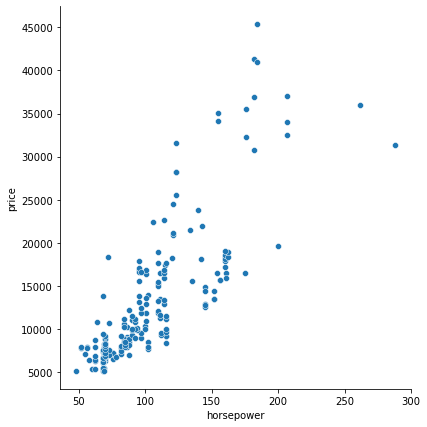

In \[53\]:

    list = []
    for i in cars.CompanyName:
        if (i not in list):
            list.append(i)
    list

Out\[53\]:

    ['alfa-romero',
     'audi',
     'bmw',
     'chevrolet',
     'dodge',
     'honda',
     'isuzu',
     'jaguar',
     'mazda',
     'buick',
     'mercury',
     'mitsubishi',
     'nissan',
     'peugeot',
     'plymouth',
     'porsche',
     'renault',
     'saab',
     'subaru',
     'toyota',
     'volkswagen',
     'volvo']

In \[54\]:

    cars['fueltype'] = cars['fueltype'].map({'gas': 0,'diesel': 1})
    cars['aspiration'] = cars['aspiration'].map({'std': 0,'turbo': 1})
    cars['doornumber'] = cars['doornumber'].map({'two': 0,'four': 1})
    cars['carbody'] = cars['carbody'].map({'convertible': 0,'hatchback': 1,'sedan': 2, 'wagon':3,'hardtop':4})
    cars['drivewheel'] = cars['drivewheel'].map({'rwd': 0,'fwd': 1 , '4wd': 3})
    cars['fuelsystem'] = cars['fuelsystem'].map({'mpfi': 0,'2bbl': 1, 'mfi' :2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7})
    cars['enginetype'] = cars['enginetype'].map({'dohc': 0,'ohcv': 1, 'ohc' :2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6})
    cars['enginelocation'] = cars['enginelocation'].map({'front': 0,'rear': 1})
    cars['cylindernumber'] = cars['cylindernumber'].map({'four': 0,'six': 1, 'five' :2, 'three':3, 'twelve':4, 'two':5, 'eight':6})
    cars['CompanyName'] = cars['CompanyName'].map({'alfa-romero':21,
     'audi':0,
     'bmw':1,
     'chevrolet':2,
     'dodge':3,
     'honda':4,
     'isuzu':5,
     'jaguar':6,
     'mazda':7,
     'buick':8,
     'mercury':9,
     'mitsubishi':10,
     'nissan':11,
     'peugeot':12,
     'plymouth':13,
     'porsche':14,
     'renault':15,
     'saab':16,
     'subaru':17,
     'toyota':18,
     'volkswagen':19,
     'volvo':20})

In \[55\]:

    cars

Out\[55\]:

|     | car_ID | symboling | CompanyName | fueltype | aspiration | doornumber | carbody | drivewheel | enginelocation | wheelbase | ... | enginesize | fuelsystem | boreratio | stroke | compressionratio | horsepower | peakrpm | citympg | highwaympg | price   |
|-----|--------|-----------|-------------|----------|------------|------------|---------|------------|----------------|-----------|-----|------------|------------|-----------|--------|------------------|------------|---------|---------|------------|---------|
| 0   | 1      | 3         | 21          | 0        | 0          | 0          | 0       | 0          | 0              | 88.6      | ... | 130        | 0          | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 13495.0 |
| 1   | 2      | 3         | 21          | 0        | 0          | 0          | 0       | 0          | 0              | 88.6      | ... | 130        | 0          | 3.47      | 2.68   | 9.0              | 111        | 5000    | 21      | 27         | 16500.0 |
| 2   | 3      | 1         | 21          | 0        | 0          | 0          | 1       | 0          | 0              | 94.5      | ... | 152        | 0          | 2.68      | 3.47   | 9.0              | 154        | 5000    | 19      | 26         | 16500.0 |
| 3   | 4      | 2         | 0           | 0        | 0          | 1          | 2       | 1          | 0              | 99.8      | ... | 109        | 0          | 3.19      | 3.40   | 10.0             | 102        | 5500    | 24      | 30         | 13950.0 |
| 4   | 5      | 2         | 0           | 0        | 0          | 1          | 2       | 3          | 0              | 99.4      | ... | 136        | 0          | 3.19      | 3.40   | 8.0              | 115        | 5500    | 18      | 22         | 17450.0 |
| ... | ...    | ...       | ...         | ...      | ...        | ...        | ...     | ...        | ...            | ...       | ... | ...        | ...        | ...       | ...    | ...              | ...        | ...     | ...     | ...        | ...     |
| 200 | 201    | -1        | 20          | 0        | 0          | 1          | 2       | 0          | 0              | 109.1     | ... | 141        | 0          | 3.78      | 3.15   | 9.5              | 114        | 5400    | 23      | 28         | 16845.0 |
| 201 | 202    | -1        | 20          | 0        | 1          | 1          | 2       | 0          | 0              | 109.1     | ... | 141        | 0          | 3.78      | 3.15   | 8.7              | 160        | 5300    | 19      | 25         | 19045.0 |
| 202 | 203    | -1        | 20          | 0        | 0          | 1          | 2       | 0          | 0              | 109.1     | ... | 173        | 0          | 3.58      | 2.87   | 8.8              | 134        | 5500    | 18      | 23         | 21485.0 |
| 203 | 204    | -1        | 20          | 1        | 1          | 1          | 2       | 0          | 0              | 109.1     | ... | 145        | 6          | 3.01      | 3.40   | 23.0             | 106        | 4800    | 26      | 27         | 22470.0 |
| 204 | 205    | -1        | 20          | 0        | 1          | 1          | 2       | 0          | 0              | 109.1     | ... | 141        | 0          | 3.78      | 3.15   | 9.5              | 114        | 5400    | 19      | 25         | 22625.0 |

205 rows × 26 columns

In \[56\]:

    Y = cars['price']
    X = cars[['symboling','CompanyName','fueltype','enginetype','carbody','doornumber','enginelocation','fuelsystem','cylindernumber'
             ,'aspiration','drivewheel']]

In \[57\]:

    X

Out\[57\]:

|     | symboling | CompanyName | fueltype | enginetype | carbody | doornumber | enginelocation | fuelsystem | cylindernumber | aspiration | drivewheel |
|-----|-----------|-------------|----------|------------|---------|------------|----------------|------------|----------------|------------|------------|
| 0   | 3         | 21          | 0        | 0          | 0       | 0          | 0              | 0          | 0              | 0          | 0          |
| 1   | 3         | 21          | 0        | 0          | 0       | 0          | 0              | 0          | 0              | 0          | 0          |
| 2   | 1         | 21          | 0        | 1          | 1       | 0          | 0              | 0          | 1              | 0          | 0          |
| 3   | 2         | 0           | 0        | 2          | 2       | 1          | 0              | 0          | 0              | 0          | 1          |
| 4   | 2         | 0           | 0        | 2          | 2       | 1          | 0              | 0          | 2              | 0          | 3          |
| ... | ...       | ...         | ...      | ...        | ...     | ...        | ...            | ...        | ...            | ...        | ...        |
| 200 | -1        | 20          | 0        | 2          | 2       | 1          | 0              | 0          | 0              | 0          | 0          |
| 201 | -1        | 20          | 0        | 2          | 2       | 1          | 0              | 0          | 0              | 1          | 0          |
| 202 | -1        | 20          | 0        | 1          | 2       | 1          | 0              | 0          | 1              | 0          | 0          |
| 203 | -1        | 20          | 1        | 2          | 2       | 1          | 0              | 6          | 1              | 1          | 0          |
| 204 | -1        | 20          | 0        | 2          | 2       | 1          | 0              | 0          | 0              | 1          | 0          |

205 rows × 11 columns

In \[58\]:

    Y

Out\[58\]:

    0      13495.0
    1      16500.0
    2      16500.0
    3      13950.0
    4      17450.0
            ...   
    200    16845.0
    201    19045.0
    202    21485.0
    203    22470.0
    204    22625.0
    Name: price, Length: 205, dtype: float64

In \[65\]:

    X1 = sm.add_constant(X)
    X1.head()

Out\[65\]:

|     | const | symboling | CompanyName | fueltype | enginetype | carbody | doornumber | enginelocation | fuelsystem | cylindernumber | aspiration | drivewheel |
|-----|-------|-----------|-------------|----------|------------|---------|------------|----------------|------------|----------------|------------|------------|
| 0   | 1.0   | 3         | 21          | 0        | 0          | 0       | 0          | 0              | 0          | 0              | 0          | 0          |
| 1   | 1.0   | 3         | 21          | 0        | 0          | 0       | 0          | 0              | 0          | 0              | 0          | 0          |
| 2   | 1.0   | 1         | 21          | 0        | 1          | 1       | 0          | 0              | 0          | 1              | 0          | 0          |
| 3   | 1.0   | 2         | 0           | 0        | 2          | 2       | 1          | 0              | 0          | 0              | 0          | 1          |
| 4   | 1.0   | 2         | 0           | 0        | 2          | 2       | 1          | 0              | 0          | 2              | 0          | 3          |

In \[60\]:

    results_mul = sm.OLS(Y,X1).fit()

In \[61\]:

    print(results_mul.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                  price   R-squared:                       0.695
    Model:                            OLS   Adj. R-squared:                  0.678
    Method:                 Least Squares   F-statistic:                     39.98
    Date:                Fri, 18 Mar 2022   Prob (F-statistic):           6.25e-44
    Time:                        01:30:57   Log-Likelihood:                -2010.8
    No. Observations:                 205   AIC:                             4046.
    Df Residuals:                     193   BIC:                             4085.
    Df Model:                          11                                         
    Covariance Type:            nonrobust                                         
    ==================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
    ----------------------------------------------------------------------------------
    const           1.671e+04   1385.524     12.058      0.000     1.4e+04    1.94e+04
    symboling       -575.9972    358.844     -1.605      0.110   -1283.756     131.762
    CompanyName     -127.3841     54.887     -2.321      0.021    -235.639     -19.130
    fueltype        4796.9812   1623.289      2.955      0.004    1595.317    7998.645
    enginetype     -1100.3125    338.000     -3.255      0.001   -1766.960    -433.665
    carbody          311.7507    448.483      0.695      0.488    -572.806    1196.308
    doornumber      1070.6462    908.801      1.178      0.240    -721.811    2863.103
    enginelocation  2.269e+04   3030.183      7.488      0.000    1.67e+04    2.87e+04
    fuelsystem     -1199.3146    225.386     -5.321      0.000   -1643.851    -754.778
    cylindernumber  3311.2474    276.984     11.955      0.000    2764.944    3857.551
    aspiration      6115.5043    945.468      6.468      0.000    4250.728    7980.280
    drivewheel     -2882.7246    529.967     -5.439      0.000   -3927.996   -1837.453
    ==============================================================================
    Omnibus:                       66.607   Durbin-Watson:                   1.033
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.559
    Skew:                           1.256   Prob(JB):                     2.37e-55
    Kurtosis:                       7.810   Cond. No.                         130.
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In \[69\]:

    symboling =3
    CompanyName=1
    fueltype=0
    aspiration=1
    doornumber=0
    carbody=2
    drivewheel=3
    fuelsystem=7
    enginetype = 2
    enginelocation = 1
    cylindernumber = 3

    cars = (16710 + symboling*-575.9972 + CompanyName*-127.3841 + fueltype*4796.9812 + aspiration*6115.5043 + 
            doornumber*1070.6462 + carbody*311.7507 + drivewheel*-2882.7246 + fuelsystem*-1199.3146 
            + enginetype*-1100.3125 + enginelocation*22690 + cylindernumber*3311.2474 )
    cars

Out\[69\]:

    34973.3712

In \[ \]: